## CS 250 – PROGRAMMING FOR DATA APPLICATIONS PROJECT 1

Monica G. and Sara Dabak

### California Housing Prices

**Link:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

**Purpose:**  
We chose it because it would be interesting learning about how different varibles in a house can increase and decrease its value. 

More specifically we found the variable of whether the house was near or far from the bay interesting. And we wanted to predict the cost of a house based on its distance to the bay.

**Background**

This data is from the California district and it contains housing summary stats from the 1990 census data.

<img src = https://images.mapsofworld.com/usa/states/california/california-lat-long-map.jpg width = "500" height = "800" >

### Analysis of the California Housing Prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sn
np.random.seed(56)

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Checking total rows and column in our data

In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Meaning of each column

1. **longitude**: A measure of how far west a house is; a higher value is farther west
2. **latitude**: A measure of how far north a house is; a higher value is farther north
3. **housing_median_age**: Median age of a house within a block; a lower number is a newer building
4. **total_rooms**: Total number of rooms within a block
5. **total_bedrooms**: Total number of bedrooms within a block
6. **population**: Total number of people residing within a block
7. **households**:Total number of households, a group of people residing within a home unit, for a block
8. **median_income**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **median_house_value**: Median house value for households within a block (measured in US Dollars)
10. **ocean_proximity**:Location of the house with reference to the ocean/sea

In [5]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 Checking if the data is clean. There are 207 missing values for total_rooms

In [6]:
op_types = data.ocean_proximity.unique()
op_nums = list(range(len(op_types)))
mappings = dict(zip(op_types,op_nums))
mappings

{'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}

In [7]:
types = []
for i in data.ocean_proximity:
    types.append(mappings[i])

Text(0, 0.5, 'Median House Value')

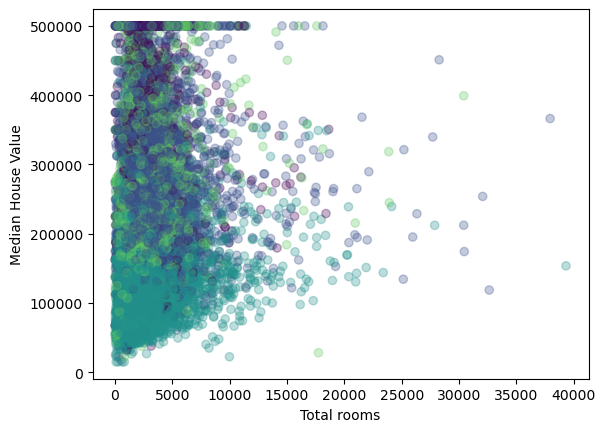

In [8]:
plt.scatter(data.total_rooms,data.median_house_value,c = types, alpha = 0.3)
plt.xlabel('Total rooms')
plt.ylabel('Median House Value')

The majority of the homes in california have less than 10000 rooms per block.

Text(0, 0.5, 'Median house value')

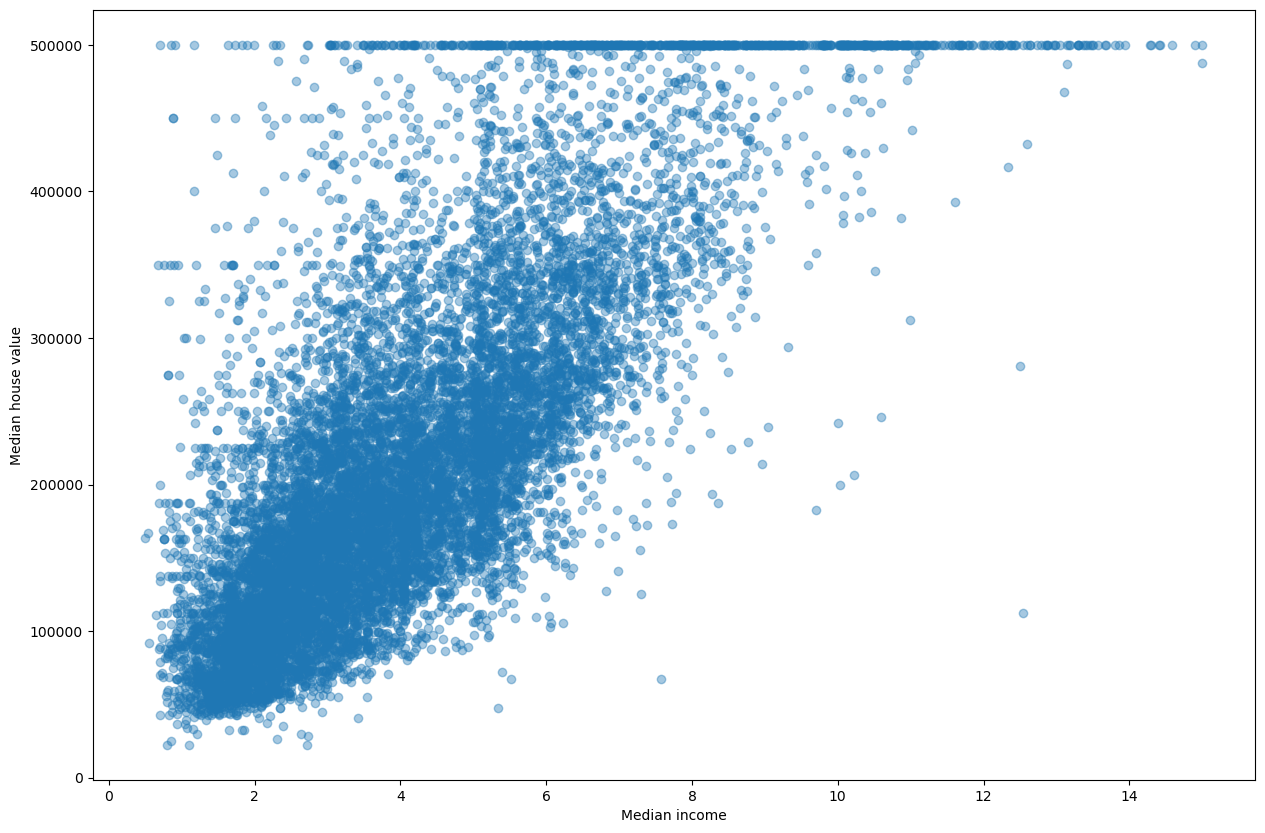

In [9]:
income_list = list(data.median_income.unique())

median_house_value = []
for i in income_list:
    x= data[data.median_income==i]
    housevalue_average=sum(x.median_house_value)/len(x)
    median_house_value.append(housevalue_average)

df1 = pd.DataFrame({'income_list':income_list, 'median_house_value':median_house_value})
new_index = df1.median_house_value.sort_values(ascending=False).index.values
sorted_data_income = df1.reindex(new_index)

plt.figure(figsize=(15,10))
plt.scatter(sorted_data_income.income_list,sorted_data_income.median_house_value, alpha = 0.4)

plt.xlabel('Median income')
plt.ylabel('Median house value')

### Why is there a line at $500k?
On kaggle other users pointed this out, some said they just omitted those rows since the house values aren't accurate

In [10]:
above_500k = df1[(df1['median_house_value'] > 499999)]
above_500k.head(10)

,income_list,median_house_value
437,1.1696,500001.0
469,7.8521,500001.0
470,9.3959,500001.0
484,7.8772,500001.0
485,11.8603,500001.0
486,13.4990,500001.0
487,12.2138,500001.0
489,12.3804,500001.0
492,8.7477,500001.0
858,9.7194,500001.0


In [11]:
vc = data['ocean_proximity'].value_counts()
vc

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

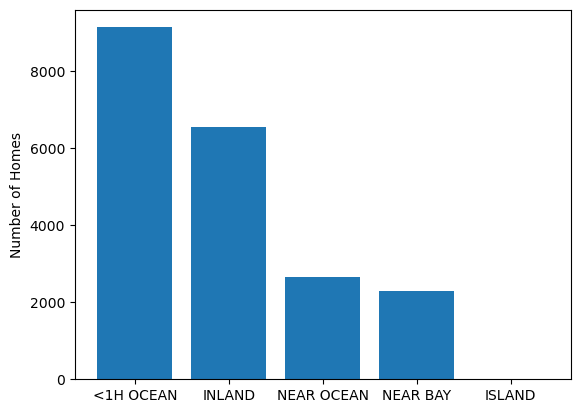

In [13]:
plt.bar(vc.keys(),vc)
plt.ylabel('Number of Homes')
plt.show()

There are more homes less than one hour away from the ocean and in inland compared to other locations. 

### Solving the Problem

In [14]:
clustering_income = data[['median_income','median_house_value']]

scaler = StandardScaler()
norm_income = scaler.fit_transform(clustering_income)

pca = PCA(whiten = True)
low_income = pca.fit_transform(norm_income)

print(low_income)

[[ 2.43507938  0.27236992]
 [ 1.98445927  1.28893857]
 [ 1.65520238  0.66341576]
 ...
 [-1.16210556 -0.189713  ]
 [-1.15005184  0.00509653]
 [-0.97852085  0.30100065]]


In [15]:
bw = estimate_bandwidth(low_income)
print(bw)

1.1818908649921034


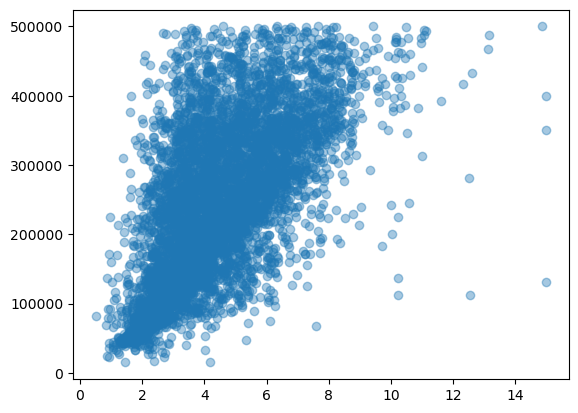

In [16]:
m1 = MeanShift(bandwidth=bw)
m1.fit(clustering_income)
plt.scatter(m1.cluster_centers_[:,0],m1.cluster_centers_[:,1], alpha = 0.4)

In [17]:
labels = m1.labels_
cluster_centers = m1.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5581


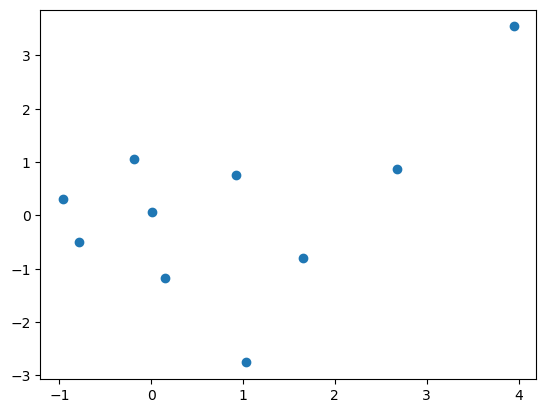

In [18]:
km = KMeans(10)
km.fit(low_income)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [19]:
longitude_data = data[['longitude','median_house_value','ocean_proximity']]
longitude_data.head(10)

,longitude,median_house_value,ocean_proximity
0,-122.23,452600.0,NEAR BAY
1,-122.22,358500.0,NEAR BAY
2,-122.24,352100.0,NEAR BAY
3,-122.25,341300.0,NEAR BAY
4,-122.25,342200.0,NEAR BAY
5,-122.25,269700.0,NEAR BAY
6,-122.25,299200.0,NEAR BAY
7,-122.25,241400.0,NEAR BAY
8,-122.26,226700.0,NEAR BAY
9,-122.25,261100.0,NEAR BAY


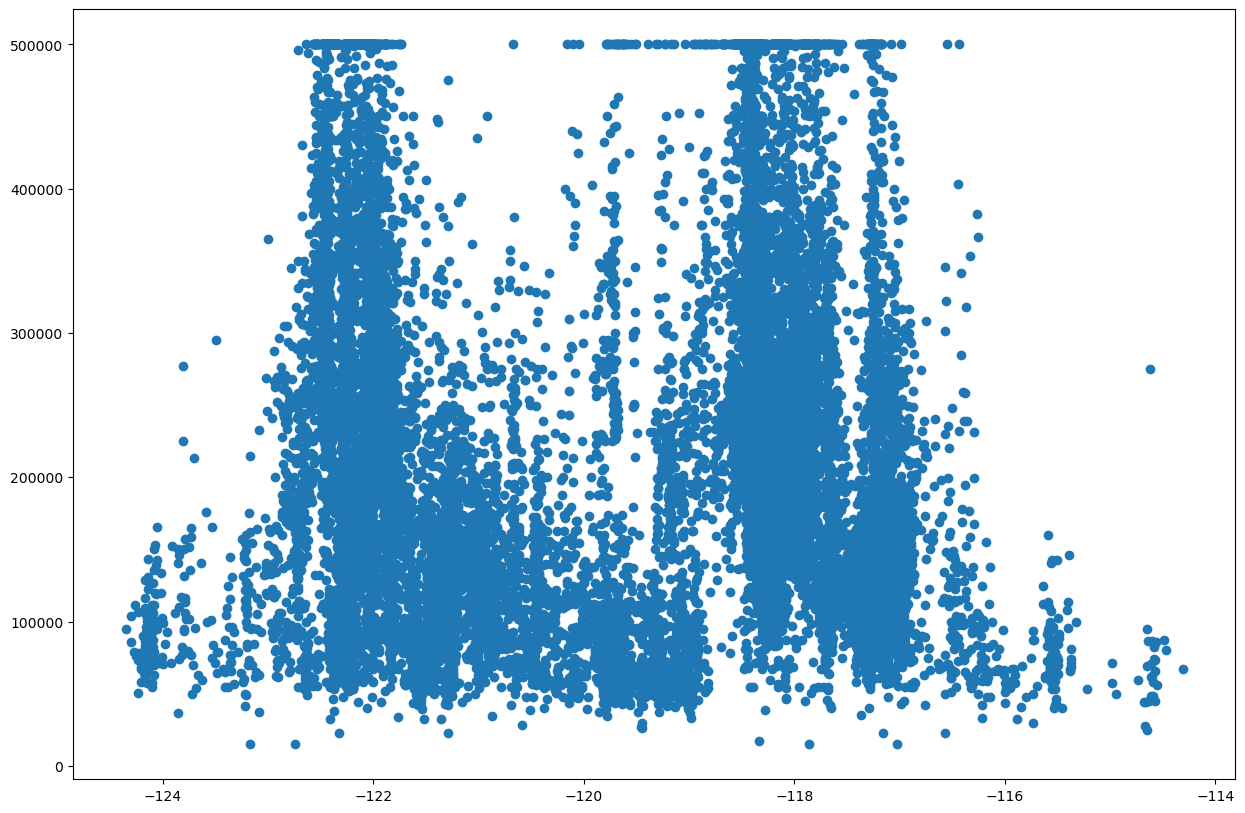

In [20]:
plt.figure(figsize=(15,10))
plt.scatter(longitude_data.longitude,longitude_data.median_house_value)

(array([1.190e+02, 4.000e+01, 3.100e+01, 6.800e+01, 2.760e+02, 1.209e+03,
        2.224e+03, 1.432e+03, 9.080e+02, 8.360e+02, 4.450e+02, 3.920e+02,
        2.270e+02, 6.100e+02, 2.610e+02, 5.800e+02, 3.130e+02, 1.994e+03,
        3.595e+03, 1.958e+03, 6.550e+02, 1.876e+03, 2.660e+02, 1.100e+02,
        6.900e+01, 1.900e+01, 9.500e+01, 3.000e+00, 8.000e+00, 2.100e+01]),
 array([-124.35      , -124.01533333, -123.68066667, -123.346     ,
        -123.01133333, -122.67666667, -122.342     , -122.00733333,
        -121.67266667, -121.338     , -121.00333333, -120.66866667,
        -120.334     , -119.99933333, -119.66466667, -119.33      ,
        -118.99533333, -118.66066667, -118.326     , -117.99133333,
        -117.65666667, -117.322     , -116.98733333, -116.65266667,
        -116.318     , -115.98333333, -115.64866667, -115.314     ,
        -114.97933333, -114.64466667, -114.31      ]),
 <BarContainer object of 30 artists>)

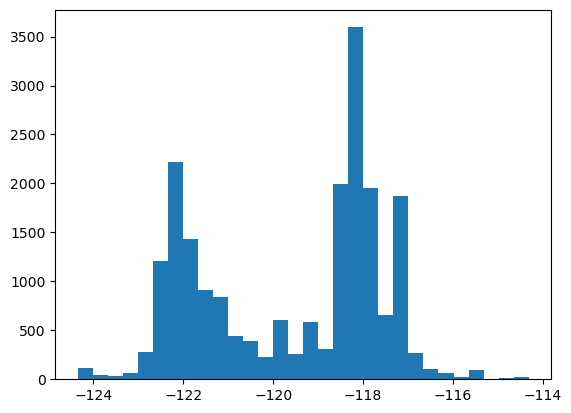

In [21]:
plt.hist(longitude_data.longitude,30)

In [22]:
clustering_longitude = data[['longitude','median_house_value']]

In [23]:
scaler = StandardScaler()
norm_longitude = scaler.fit_transform(clustering_longitude)

pca = PCA(whiten = True)
low_longitude = pca.fit_transform(norm_longitude)

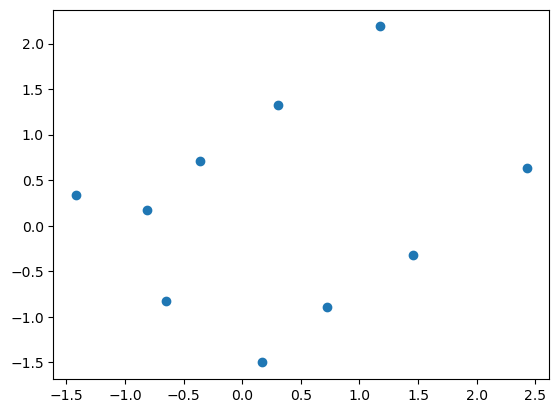

In [24]:
km = KMeans(10)
km.fit(low_longitude)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

To identify the correlation between the distance of a home and its value we used logistic regression. Logistic regression is used to describe and try to explain the relationship between the dependent and independent variables.

In [25]:
labels = np.array(data.ocean_proximity)
data['<1H OCEAN'] = np.uint8(data.ocean_proximity =='<1H OCEAN')
data['INLAND'] = np.uint8(data.ocean_proximity =='INLAND')
data['NEAR OCEAN'] = np.uint8(data.ocean_proximity =='NEAR OCEAN')
data['NEAR BAY'] = np.uint8(data.ocean_proximity =='NEAR BAY')
data['ISLAND'] = np.uint8(data.ocean_proximity =='ISLAND')

In [26]:
data.drop(['ocean_proximity','total_bedrooms','total_rooms','housing_median_age','latitude','population'], axis=1, inplace=True)
data.head()

,longitude,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,-122.23,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,259.0,3.8462,342200.0,0,0,0,1,0


In [27]:
# training/test set
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 9) (5160, 9) (15480,) (5160,)


In [36]:
model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',max_iter=1000)
model.fit(X_train, y_train)

C:\Users\17038\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [29]:
# evaluate using numeric error or success values
print(model.score(X_train, y_train))

0.6102713178294573


In the heat map, the values closer to 1 suggest a positive correlation while the ones closer to -1 suggest a negative correlation. 

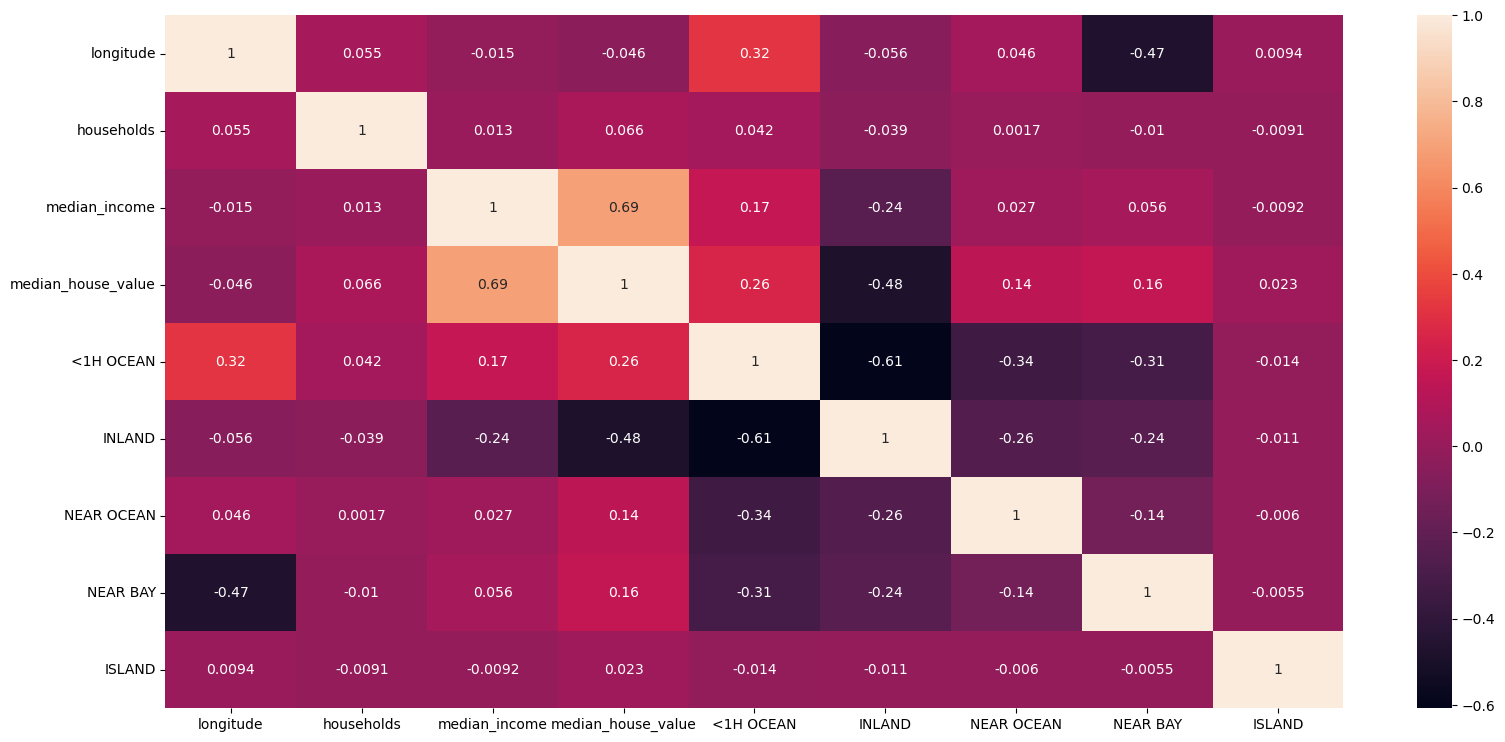

In [30]:
# plotting correlation heatmap
cor = data.corr()
  
# displaying heatmap
plt.figure(figsize = (19,9))
dataplot = sn.heatmap(cor,annot=True)
plt.show()


**The higher the house value** is the higher the income of a person has to be and vice versa.

**Inland house values** are negatively correlated to median house value, as houses near the ocean tend to be at higher value. 

**As longitude increases** the houses considered to be in a bay decreases. As the more west the more negative the longtitude numbers are.

There seems to be a positive correlations between <1H ocean and longtitude but since there isn't a set distance for each variable in ocean proximity, its hard to create a conclusion for their relationship.

In [31]:
longitude = data[['longitude','median_house_value']]

In [32]:
longitude = longitude.sample(frac=1)
print(longitude)

       longitude  median_house_value
19856    -119.41             52900.0
14663    -117.12            174200.0
20263    -119.19            224500.0
1533     -122.05            335700.0
3118     -117.81             54300.0
...          ...                 ...
12022    -117.50            139200.0
3544     -118.61            375900.0
674      -122.16             83300.0
13639    -117.32             76900.0
14240    -117.09             94200.0

[20640 rows x 2 columns]


longitude.sample(frac=1) allows us to shuffle the rows since in the original dataset the values are more or less in descending order which created problems in our linear regression model- the ending values of the dataset were significantly less expensive than those being used to train the regression model

In [33]:
mhv =longitude.median_house_value
long = longitude.longitude

In [34]:
longarray = long.to_numpy()
mhvarray = mhv.to_numpy()

This converts the data from a pandas dataframe to a numpy array which is needed for sklearn linear regression.

Coefficients: 
 [-2625.66149166]
Mean squared error: 14968922919.84
Variance score: 0.02


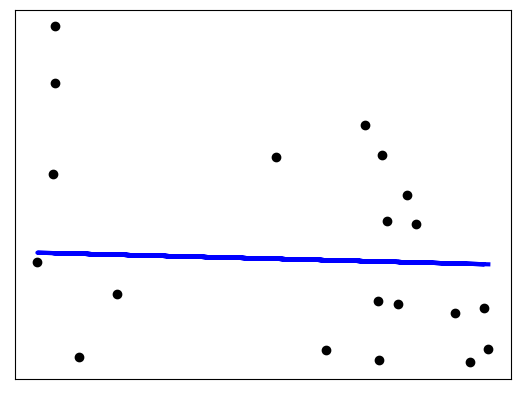

In [35]:
longitude_X = longarray[:, np.newaxis]
longitude_X_train = longitude_X[:-20]
longitude_X_test = longitude_X[-20:]
longitude_y_train = mhvarray[:-20]
longitude_y_test = mhvarray[-20:]

regr = linear_model.LinearRegression()

regr.fit(longitude_X_train, longitude_y_train)

longitude_y_pred = regr.predict(longitude_X_test)

print('Coefficients: \n' , regr.coef_)
print("Mean squared error: %.2f" % 
      mean_squared_error(longitude_y_test,longitude_y_pred))
print('Variance score: %.2f' % r2_score(longitude_y_test, longitude_y_pred))

plt.scatter(longitude_X_test, longitude_y_test, color = 'black')
plt.plot(longitude_X_test, longitude_y_pred, color = 'blue', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()